In [39]:
!pip install numpy pandas scikit-learn nltk matplotlib
!pip install seaborn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [25]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob



In [4]:
### importing the dataset with spam messages in it
df = pd.read_csv('spam.csv', encoding='latin-1')


In [5]:
# df.head() # check first five rows
df.shape
# df.info()

(5572, 5)

In [6]:
# drop columns
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [7]:
# rename the columns
df.rename(columns={'v1':'target', 'v2':'text'}, inplace = True)

In [8]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
# 1 scam
# 0 not scam


In [9]:
# drop duplicates
df = df.drop_duplicates(keep='first')


([<matplotlib.patches.Wedge at 0x7f8399abaeb0>,
 [Text(-1.0144997251399075, 0.42519443516002464, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001339, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

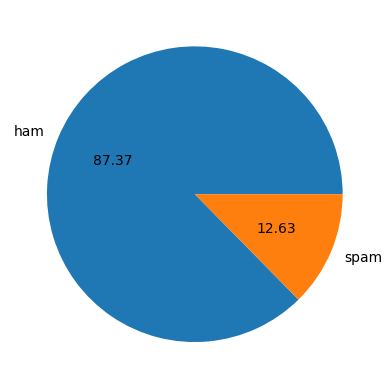

In [10]:
# showing in a pie chart
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'],  autopct="%0.2f")


In [11]:
# counting number of characters and making a new column
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
# num of words (todo)
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

In [15]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [34]:
# analyzing number of characters and words
df[['num_characters','num_words']].describe()

,num_characters,num_words
count,5169.000000,5169.000000
mean,78.977945,15.340685
std,58.236293,11.068488
min,2.000000,1.000000
25%,36.000000,7.000000
50%,60.000000,12.000000
75%,117.000000,22.000000
max,910.000000,171.000000


In [35]:
# for ham messages
df[df['target'] == 0][['num_characters','num_words']].describe()


,num_characters,num_words
count,4516.000000,4516.000000
mean,70.459256,14.134632
std,56.358207,11.116240
min,2.000000,1.000000
25%,34.000000,7.000000
50%,52.000000,11.000000
75%,90.000000,18.000000
max,910.000000,171.000000


In [36]:
# for spam messages
df[df['target'] == 1][['num_characters','num_words']].describe()

,num_characters,num_words
count,653.000000,653.000000
mean,137.891271,23.681470
std,30.137753,5.967672
min,13.000000,2.000000
25%,132.000000,22.000000
50%,149.000000,25.000000
75%,157.000000,28.000000
max,224.000000,35.000000


In [40]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

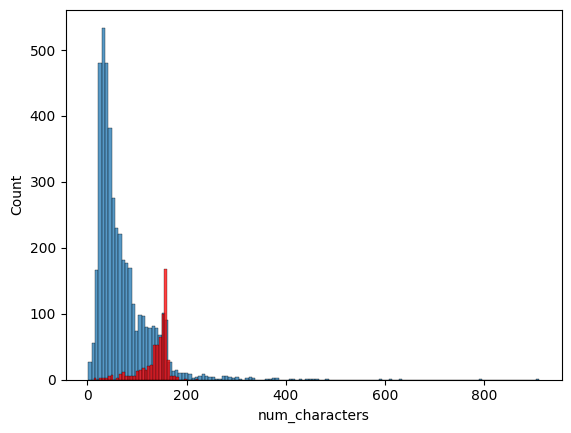

In [41]:

sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color="red")